## Import libereries

In [125]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder
from datasist.structdata  import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

### dataset is splited in thre files train , test & y test 
we will mere all in one datafram

In [126]:
train_data = pd.read_csv("3-HR Analytics Job Change of Data Scientists\Aug_train.csv", index_col=0) # index_col=0 for use enrollee_id as index
train_data.head(5)

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN        Graduate  Business Degree         <1   
666               no_enrollment         Masters             STEM        >20   

            company_size    company_type last_new_job  training_hours  target  
enrollee_id                                                                    
8949                 NaN             NaN            1              36     1.0  
29725              50-99         Pvt Ltd           >4              47     0.0  
11561                NaN             NaN        never              83     0.0  
33241                NaN         Pvt Ltd        never              52     1.0  
666                50-99  Funded Startup            4               8     0.0

#### Merge the test data with its target 'y column' in one dataframe

In [127]:
data1 = pd.read_csv("3-HR Analytics Job Change of Data Scientists\Aug_test.csv", index_col=0) # index_col=0 for use enrollee_id as index
data2 = pd.read_csv("3-HR Analytics Job Change of Data Scientists\sample_submission.csv", index_col=0) 
complete_test_data = data1.join(data2, on ='enrollee_id', how= "left")         
complete_test_data.head()

city  city_development_index  gender  \
enrollee_id                                             
32403         city_41                   0.827    Male   
9858         city_103                   0.920  Female   
31806         city_21                   0.624    Male   
27385         city_13                   0.827    Male   
27724        city_103                   0.920    Male   

                 relevent_experience enrolled_university education_level  \
enrollee_id                                                                
32403        Has relevent experience    Full time course        Graduate   
9858         Has relevent experience       no_enrollment        Graduate   
31806         No relevent experience       no_enrollment     High School   
27385        Has relevent experience       no_enrollment         Masters   
27724        Has relevent experience       no_enrollment        Graduate   

            major_discipline experience company_size company_type  \
enrollee_id                                                         
32403                   STEM          9          <10          NaN   
9858                    STEM          5          NaN      Pvt Ltd   
31806                    NaN         <1          NaN      Pvt Ltd   
27385                   STEM         11        10/49      Pvt Ltd   
27724                   STEM        >20       10000+      Pvt Ltd   

            last_new_job  training_hours  target  
enrollee_id                                       
32403                  1              21     0.5  
9858                   1              98     0.5  
31806              never              15     0.5  
27385                  1              39     0.5  
27724                 >4              72     0.5

### concatenate the train data with complete test data to revert the data to original

In [128]:
data = pd.concat([train_data,complete_test_data],axis=0).reset_index() # Concatenate the two dataframes along the rows (axis=0) and reset the index
data.drop(['enrollee_id','city'],axis=1,inplace=True) # Drop the 'enrollee_id' and 'city' columns from the dataframe
data['looking_for_job_change'] = data['target'].map({0 : 'No' , 1 : 'Yes'}) # Map the target values to the new categories using the mapping dictionary
data

city_development_index gender      relevent_experience  \
0                       0.920   Male  Has relevent experience   
1                       0.776   Male   No relevent experience   
2                       0.624    NaN   No relevent experience   
3                       0.789    NaN   No relevent experience   
4                       0.767   Male  Has relevent experience   
...                       ...    ...                      ...   
21282                   0.920   Male   No relevent experience   
21283                   0.897   Male  Has relevent experience   
21284                   0.887   Male   No relevent experience   
21285                   0.804   Male  Has relevent experience   
21286                   0.804   Male  Has relevent experience   

      enrolled_university education_level major_discipline experience  \
0           no_enrollment        Graduate             STEM        >20   
1           no_enrollment        Graduate             STEM         15   
2        Full time course        Graduate             STEM          5   
3                     NaN        Graduate  Business Degree         <1   
4           no_enrollment         Masters             STEM        >20   
...                   ...             ...              ...        ...   
21282       no_enrollment        Graduate       Humanities         16   
21283       no_enrollment         Masters             STEM         18   
21284       no_enrollment  Primary School              NaN          3   
21285    Full time course     High School              NaN          7   
21286       no_enrollment         Masters             STEM         15   

      company_size    company_type last_new_job  training_hours  target  \
0              NaN             NaN            1              36     1.0   
1            50-99         Pvt Ltd           >4              47     0.0   
2              NaN             NaN        never              83     0.0   
3              NaN         Pvt Ltd        never              52     1.0   
4            50-99  Funded Startup            4               8     0.0   
...            ...             ...          ...             ...     ...   
21282          NaN   Public Sector            4              15     0.5   
21283          NaN             NaN            2              30     0.5   
21284          NaN         Pvt Ltd        never              18     0.5   
21285      100-500   Public Sector            1              84     0.5   
21286       10000+         Pvt Ltd            2              11     0.5   

      looking_for_job_change  
0                        Yes  
1                         No  
2                         No  
3                        Yes  
4                         No  
...                      ...  
21282                    NaN  
21283                    NaN  
21284                    NaN  
21285                    NaN  
21286                    NaN  

[21287 rows x 13 columns]

In [129]:
#data.reset_index( drop= True , inplace=True) # Reset the index of the concatenated dataframe and drop the old index

In [130]:
data

city_development_index gender      relevent_experience  \
0                       0.920   Male  Has relevent experience   
1                       0.776   Male   No relevent experience   
2                       0.624    NaN   No relevent experience   
3                       0.789    NaN   No relevent experience   
4                       0.767   Male  Has relevent experience   
...                       ...    ...                      ...   
21282                   0.920   Male   No relevent experience   
21283                   0.897   Male  Has relevent experience   
21284                   0.887   Male   No relevent experience   
21285                   0.804   Male  Has relevent experience   
21286                   0.804   Male  Has relevent experience   

      enrolled_university education_level major_discipline experience  \
0           no_enrollment        Graduate             STEM        >20   
1           no_enrollment        Graduate             STEM         15   
2        Full time course        Graduate             STEM          5   
3                     NaN        Graduate  Business Degree         <1   
4           no_enrollment         Masters             STEM        >20   
...                   ...             ...              ...        ...   
21282       no_enrollment        Graduate       Humanities         16   
21283       no_enrollment         Masters             STEM         18   
21284       no_enrollment  Primary School              NaN          3   
21285    Full time course     High School              NaN          7   
21286       no_enrollment         Masters             STEM         15   

      company_size    company_type last_new_job  training_hours  target  \
0              NaN             NaN            1              36     1.0   
1            50-99         Pvt Ltd           >4              47     0.0   
2              NaN             NaN        never              83     0.0   
3              NaN         Pvt Ltd        never              52     1.0   
4            50-99  Funded Startup            4               8     0.0   
...            ...             ...          ...             ...     ...   
21282          NaN   Public Sector            4              15     0.5   
21283          NaN             NaN            2              30     0.5   
21284          NaN         Pvt Ltd        never              18     0.5   
21285      100-500   Public Sector            1              84     0.5   
21286       10000+         Pvt Ltd            2              11     0.5   

      looking_for_job_change  
0                        Yes  
1                         No  
2                         No  
3                        Yes  
4                         No  
...                      ...  
21282                    NaN  
21283                    NaN  
21284                    NaN  
21285                    NaN  
21286                    NaN  

[21287 rows x 13 columns]

In [131]:
copy_data = data.copy() # Create a copy of the concatenated dataframe
data.to_csv("3-HR Analytics Job Change of Data Scientists\Data_before cleaning.csv", index= False) # Save the concatenated dataframe to a CSV file without the index

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21287 non-null  float64
 1   gender                  16271 non-null  object 
 2   relevent_experience     21287 non-null  object 
 3   enrolled_university     20870 non-null  object 
 4   education_level         20775 non-null  object 
 5   major_discipline        18162 non-null  object 
 6   experience              21217 non-null  object 
 7   company_size            14727 non-null  object 
 8   company_type            14513 non-null  object 
 9   last_new_job            20824 non-null  object 
 10  training_hours          21287 non-null  int64  
 11  target                  21287 non-null  float64
 12  looking_for_job_change  19158 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [133]:
data.describe()

city_development_index  training_hours        target
count            21287.000000    21287.000000  21287.000000
mean                 0.828462       65.328510      0.274416
std                  0.123537       60.075201      0.417273
min                  0.448000        1.000000      0.000000
25%                  0.739000       23.000000      0.000000
50%                  0.903000       47.000000      0.000000
75%                  0.920000       88.000000      0.500000
max                  0.949000      336.000000      1.000000

In [134]:
data.describe(include="object")

gender      relevent_experience enrolled_university education_level  \
count   16271                    21287               20870           20775   
unique      3                        2                   3               5   
top      Male  Has relevent experience       no_enrollment        Graduate   
freq    14681                    15316               15336           12867   

       major_discipline experience company_size company_type last_new_job  \
count             18162      21217        14727        14513        20824   
unique                6         22            8            6            6   
top                STEM        >20        50-99      Pvt Ltd            1   
freq              16113       3669         3421        10958         8924   

       looking_for_job_change  
count                   19158  
unique                      2  
top                        No  
freq                    14381

In [135]:
data.isnull().sum()

city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
looking_for_job_change    2129
dtype: int64

## checking & remove duplicaes

In [136]:
data[data.duplicated()].shape[0]

62

In [137]:
data.drop_duplicates(inplace=True) # Drop duplicate rows from the DataFrame
data.reset_index(drop=True, inplace=True) 

Drop city column as city_deelopment _index column is enough in the model

In [138]:
#data.drop(columns=['city'], inplace=True) # Drop the city column

In [139]:
data.groupby('gender')['gender'].count()

gender
Female     1374
Male      14620
Other       215
Name: gender, dtype: int64

In [140]:
data.groupby('gender')['gender'].count()/(data[~data['gender'].isna()]['gender'].count()) * 100 

gender
Female     8.476772
Male      90.196804
Other      1.326424
Name: gender, dtype: float64

### Percentage of null data in gender column

In [141]:
print(round(data['gender'].isna().sum()/len(data) *100 ,2) , "% is null data in gender")

23.63 % is null data in gender


In [142]:
## replace the missing values with the mode of the column which is male = 90 % instead of dropping 23.5% from the data

In [143]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True) # Fill missing values


C:\Users\KING\AppData\Local\Temp\ipykernel_9256\3302207640.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21225 entries, 0 to 21224
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21225 non-null  float64
 1   gender                  21225 non-null  object 
 2   relevent_experience     21225 non-null  object 
 3   enrolled_university     20808 non-null  object 
 4   education_level         20713 non-null  object 
 5   major_discipline        18104 non-null  object 
 6   experience              21155 non-null  object 
 7   company_size            14689 non-null  object 
 8   company_type            14475 non-null  object 
 9   last_new_job            20762 non-null  object 
 10  training_hours          21225 non-null  int64  
 11  target                  21225 non-null  float64
 12  looking_for_job_change  19098 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [145]:
data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       15279
Full time course     4187
Part time course     1342
Name: count, dtype: int64

In [146]:
data[data['enrolled_university'].isna()]

city_development_index gender      relevent_experience  \
3                       0.789   Male   No relevent experience   
13                      0.624   Male   No relevent experience   
62                      0.827   Male  Has relevent experience   
69                      0.698   Male   No relevent experience   
171                     0.698   Male  Has relevent experience   
...                       ...    ...                      ...   
20859                   0.698   Male   No relevent experience   
20936                   0.926   Male  Has relevent experience   
21008                   0.926   Male   No relevent experience   
21162                   0.743   Male  Has relevent experience   
21204                   0.939   Male   No relevent experience   

      enrolled_university education_level major_discipline experience  \
3                     NaN        Graduate  Business Degree         <1   
13                    NaN             NaN              NaN          2   
62                    NaN         Masters             STEM         13   
69                    NaN             NaN              NaN          2   
171                   NaN             NaN              NaN        >20   
...                   ...             ...              ...        ...   
20859                 NaN             NaN              NaN          1   
20936                 NaN        Graduate             STEM          5   
21008                 NaN        Graduate             STEM         12   
21162                 NaN         Masters             STEM          9   
21204                 NaN     High School              NaN          2   

      company_size company_type last_new_job  training_hours  target  \
3              NaN      Pvt Ltd        never              52     1.0   
13             NaN          NaN        never              24     0.0   
62             <10          NaN            1              15     0.0   
69             NaN      Pvt Ltd        never             228     1.0   
171            NaN          NaN           >4              33     0.0   
...            ...          ...          ...             ...     ...   
20859          NaN          NaN          NaN             260     0.5   
20936        10/49      Pvt Ltd            2              17     0.5   
21008          NaN          NaN            2             104     0.5   
21162    1000-4999          NaN            2              66     0.5   
21204          NaN          NaN        never              44     0.5   

      looking_for_job_change  
3                        Yes  
13                        No  
62                        No  
69                       Yes  
171                       No  
...                      ...  
20859                    NaN  
20936                    NaN  
21008                    NaN  
21162                    NaN  
21204                    NaN  

[417 rows x 13 columns]

In [147]:
data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [148]:
data['education_level'].value_counts() 

education_level
Graduate          12812
Masters            4854
High School        2235
Phd                 468
Primary School      344
Name: count, dtype: int64

In [149]:
data['education_level'].dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21225 entries, 0 to 21224
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21225 non-null  float64
 1   gender                  21225 non-null  object 
 2   relevent_experience     21225 non-null  object 
 3   enrolled_university     20808 non-null  object 
 4   education_level         20713 non-null  object 
 5   major_discipline        18104 non-null  object 
 6   experience              21155 non-null  object 
 7   company_size            14689 non-null  object 
 8   company_type            14475 non-null  object 
 9   last_new_job            20762 non-null  object 
 10  training_hours          21225 non-null  int64  
 11  target                  21225 non-null  float64
 12  looking_for_job_change  19098 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21225 entries, 0 to 21224
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21225 non-null  float64
 1   gender                  21225 non-null  object 
 2   relevent_experience     21225 non-null  object 
 3   enrolled_university     20808 non-null  object 
 4   education_level         20713 non-null  object 
 5   major_discipline        18104 non-null  object 
 6   experience              21155 non-null  object 
 7   company_size            14689 non-null  object 
 8   company_type            14475 non-null  object 
 9   last_new_job            20762 non-null  object 
 10  training_hours          21225 non-null  int64  
 11  target                  21225 non-null  float64
 12  looking_for_job_change  19098 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [151]:
data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       15279
Full time course     4187
Part time course     1342
Name: count, dtype: int64

### replace the nill dada in 'enrolled_university' with the mod which is no_enrollment

In [152]:
data['enrolled_university'].fillna(data['enrolled_university'].mode()[0], inplace=True) # Fill missing values with the mode of the column

C:\Users\KING\AppData\Local\Temp\ipykernel_9256\1508408690.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21225 entries, 0 to 21224
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21225 non-null  float64
 1   gender                  21225 non-null  object 
 2   relevent_experience     21225 non-null  object 
 3   enrolled_university     21225 non-null  object 
 4   education_level         20713 non-null  object 
 5   major_discipline        18104 non-null  object 
 6   experience              21155 non-null  object 
 7   company_size            14689 non-null  object 
 8   company_type            14475 non-null  object 
 9   last_new_job            20762 non-null  object 
 10  training_hours          21225 non-null  int64  
 11  target                  21225 non-null  float64
 12  looking_for_job_change  19098 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [154]:
data.groupby(by=['education_level','major_discipline'],dropna=False)['major_discipline'].value_counts()

education_level  major_discipline
Graduate         Arts                  223
                 Business Degree       261
                 Humanities            472
                 No Major              214
                 Other                 306
                 STEM                11313
                 NaN                    23
High School      NaN                  2235
Masters          Arts                   43
                 Business Degree        98
                 Humanities            248
                 No Major               31
                 Other                 106
                 STEM                 4321
                 NaN                     7
Phd              Arts                    4
                 Business Degree         5
                 Humanities             29
                 Other                   9
                 STEM                  421
Primary School   NaN                   344
NaN              NaN                   512
Name: count, dtype: 

### Drop missing values in major_discipline which will handle also education_level

In [155]:
data.dropna(subset = ['major_discipline'] , inplace=True) # Drop rows with missing values in the major_discipline column
data.reset_index(drop=True, inplace=True) # Reset the index of the DataFrame after dropping rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18104 entries, 0 to 18103
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18104 non-null  float64
 1   gender                  18104 non-null  object 
 2   relevent_experience     18104 non-null  object 
 3   enrolled_university     18104 non-null  object 
 4   education_level         18104 non-null  object 
 5   major_discipline        18104 non-null  object 
 6   experience              18054 non-null  object 
 7   company_size            13458 non-null  object 
 8   company_type            13164 non-null  object 
 9   last_new_job            17769 non-null  object 
 10  training_hours          18104 non-null  int64  
 11  target                  18104 non-null  float64
 12  looking_for_job_change  16289 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.8+ MB


In [156]:
data['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '16', '1', '2', '4',
       '10', '14', '18', '19', '12', '6', '9', '3', '8', '20', nan],
      dtype=object)

In [157]:
data.dropna(subset = ['experience'] , inplace=True) # Drop rows with missing values in the experience column
data.reset_index(drop=True, inplace=True) # Reset the index of the DataFrame after dropping rows

In [158]:
data['experience'].value_counts().sort_index(ascending=True)

experience
1       415
10      977
11      677
12      498
13      429
14      601
15      695
16      529
17      356
18      284
19      302
2       856
20      155
3      1111
4      1200
5      1287
6      1124
7       985
8       766
9       973
<1      423
>20    3411
Name: count, dtype: int64

### mapping experience in five groups instead of 21

In [159]:
experience_mapping = {
    '0': 'less_than_3',
    '<1': 'less_than_3',
    '1': 'less_than_3',
    '2': 'less_than_3',
    '3': '3_to_5',
    '4': '3_to_5',
    '5': '3_to_5',
    '6': '6_to_9',
    '7': '6_to_9',
    '8': '6_to_9',
    '9': '6_to_9',
    '10': '10_to_15',
    '11': '10_to_15',
    '12': '10_to_15',
    '13': '10_to_15',
    '14': '10_to_15',
    '15': '10_to_15',
    '16': 'More_than_15',
    '17': 'More_than_15',
    '18': 'More_than_15',
    '19': 'More_than_15',
    '20': 'More_than_15',
    '>20': 'More_than_15',
}

In [160]:
data['experience'] = data['experience'].map(experience_mapping) # Map the experience values to the new categories using the mapping dictionary
data['experience'].value_counts()

experience
More_than_15    5037
10_to_15        3877
6_to_9          3848
3_to_5          3598
less_than_3     1694
Name: count, dtype: int64

In [161]:
data

city_development_index gender      relevent_experience  \
0                       0.920   Male  Has relevent experience   
1                       0.776   Male   No relevent experience   
2                       0.624   Male   No relevent experience   
3                       0.789   Male   No relevent experience   
4                       0.767   Male  Has relevent experience   
...                       ...    ...                      ...   
18049                   0.878   Male   No relevent experience   
18050                   0.698   Male   No relevent experience   
18051                   0.920   Male   No relevent experience   
18052                   0.897   Male  Has relevent experience   
18053                   0.804   Male  Has relevent experience   

      enrolled_university education_level major_discipline    experience  \
0           no_enrollment        Graduate             STEM  More_than_15   
1           no_enrollment        Graduate             STEM      10_to_15   
2        Full time course        Graduate             STEM        3_to_5   
3           no_enrollment        Graduate  Business Degree   less_than_3   
4           no_enrollment         Masters             STEM  More_than_15   
...                   ...             ...              ...           ...   
18049       no_enrollment         Masters             STEM  More_than_15   
18050       no_enrollment        Graduate             STEM  More_than_15   
18051       no_enrollment        Graduate       Humanities  More_than_15   
18052       no_enrollment         Masters             STEM  More_than_15   
18053       no_enrollment         Masters             STEM      10_to_15   

      company_size    company_type last_new_job  training_hours  target  \
0              NaN             NaN            1              36     1.0   
1            50-99         Pvt Ltd           >4              47     0.0   
2              NaN             NaN        never              83     0.0   
3              NaN         Pvt Ltd        never              52     1.0   
4            50-99  Funded Startup            4               8     0.0   
...            ...             ...          ...             ...     ...   
18049          <10         Pvt Ltd           >4              58     0.5   
18050          NaN             NaN        never             133     0.5   
18051          NaN   Public Sector            4              15     0.5   
18052          NaN             NaN            2              30     0.5   
18053       10000+         Pvt Ltd            2              11     0.5   

      looking_for_job_change  
0                        Yes  
1                         No  
2                         No  
3                        Yes  
4                         No  
...                      ...  
18049                    NaN  
18050                    NaN  
18051                    NaN  
18052                    NaN  
18053                    NaN  

[18054 rows x 13 columns]

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18054 entries, 0 to 18053
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18054 non-null  float64
 1   gender                  18054 non-null  object 
 2   relevent_experience     18054 non-null  object 
 3   enrolled_university     18054 non-null  object 
 4   education_level         18054 non-null  object 
 5   major_discipline        18054 non-null  object 
 6   experience              18054 non-null  object 
 7   company_size            13420 non-null  object 
 8   company_type            13137 non-null  object 
 9   last_new_job            17737 non-null  object 
 10  training_hours          18054 non-null  int64  
 11  target                  18054 non-null  float64
 12  looking_for_job_change  16241 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.8+ MB


In [163]:
data['company_size'].value_counts(dropna=False)

company_size
NaN          4634
50-99        3110
100-500      2647
10000+       2097
10/49        1464
1000-4999    1353
<10          1270
500-999       896
5000-9999     583
Name: count, dtype: int64

In [164]:
data['company_size'].fillna(data['company_size'].mode()[0], inplace=True) # Fill missing values with the mode of the column

C:\Users\KING\AppData\Local\Temp\ipykernel_9256\3633949722.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [165]:
data['company_type'].value_counts(dropna=False)

company_type
Pvt Ltd                9897
NaN                    4917
Funded Startup         1014
Public Sector           985
Early Stage Startup     589
NGO                     535
Other                   117
Name: count, dtype: int64

In [166]:
data['company_type'].fillna(data['company_type'].mode()[0], inplace=True) # Fill missing values with the mode of the column

C:\Users\KING\AppData\Local\Temp\ipykernel_9256\2347615762.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [167]:
data['last_new_job'].value_counts(dropna=False)

last_new_job
1        7825
>4       3354
2        2918
never    1508
4        1068
3        1064
NaN       317
Name: count, dtype: int64

In [168]:
data.dropna(subset=['last_new_job'], inplace=True) # Drop rows with missing values in the last_new_job column
data.reset_index(drop=True, inplace=True) # Reset the index of the DataFrame after dropping rows
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17737 non-null  float64
 1   gender                  17737 non-null  object 
 2   relevent_experience     17737 non-null  object 
 3   enrolled_university     17737 non-null  object 
 4   education_level         17737 non-null  object 
 5   major_discipline        17737 non-null  object 
 6   experience              17737 non-null  object 
 7   company_size            17737 non-null  object 
 8   company_type            17737 non-null  object 
 9   last_new_job            17737 non-null  object 
 10  training_hours          17737 non-null  int64  
 11  target                  17737 non-null  float64
 12  looking_for_job_change  15951 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.8+ MB


In [169]:
data['last_new_job'] = data['last_new_job'].map({'never' : 0 ,'1' : 1 ,'2' : 2 ,'3' : 3 , '4' : 4 , '>4' : 5}) # Replace 'never' with 0 in the last_new_job column
data['last_new_job'].value_counts()

last_new_job
1    7825
5    3354
2    2918
0    1508
4    1068
3    1064
Name: count, dtype: int64

In [170]:
data['last_new_job'] = data['last_new_job'].astype('int') # Convert the last_new_job column to integer type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17737 non-null  float64
 1   gender                  17737 non-null  object 
 2   relevent_experience     17737 non-null  object 
 3   enrolled_university     17737 non-null  object 
 4   education_level         17737 non-null  object 
 5   major_discipline        17737 non-null  object 
 6   experience              17737 non-null  object 
 7   company_size            17737 non-null  object 
 8   company_type            17737 non-null  object 
 9   last_new_job            17737 non-null  int32  
 10  training_hours          17737 non-null  int64  
 11  target                  17737 non-null  float64
 12  looking_for_job_change  15951 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1.7+ MB


In [171]:
data['last_new_job'].value_counts(dropna = False).sort_index()

last_new_job
0    1508
1    7825
2    2918
3    1064
4    1068
5    3354
Name: count, dtype: int64

In [172]:
data['target'].unique()

array([1. , 0. , 0.5])

In [173]:
data['target'].value_counts(dropna=False)

target
0.0    11877
1.0     4074
0.5     1786
Name: count, dtype: int64

In [174]:
data.drop(data[data['target'] == 0.5].index,inplace=True) # Drop the target column from the DataFrame where target is equal to 0.5
data['target'].value_counts(dropna=False)

target
0.0    11877
1.0     4074
Name: count, dtype: int64

In [175]:
#data['looking_for_job_change'] = data['target'].map({0 : 'No' , 1 : 'Yes'}) # Map the target values to the new categories using the mapping dictionary

In [176]:
data.head()

city_development_index gender      relevent_experience enrolled_university  \
0                   0.920   Male  Has relevent experience       no_enrollment   
1                   0.776   Male   No relevent experience       no_enrollment   
2                   0.624   Male   No relevent experience    Full time course   
3                   0.789   Male   No relevent experience       no_enrollment   
4                   0.767   Male  Has relevent experience       no_enrollment   

  education_level major_discipline    experience company_size    company_type  \
0        Graduate             STEM  More_than_15        50-99         Pvt Ltd   
1        Graduate             STEM      10_to_15        50-99         Pvt Ltd   
2        Graduate             STEM        3_to_5        50-99         Pvt Ltd   
3        Graduate  Business Degree   less_than_3        50-99         Pvt Ltd   
4         Masters             STEM  More_than_15        50-99  Funded Startup   

   last_new_job  training_hours  target looking_for_job_change  
0             1              36     1.0                    Yes  
1             5              47     0.0                     No  
2             0              83     0.0                     No  
3             0              52     1.0                    Yes  
4             4               8     0.0                     No

## Visualization

In [177]:
plt.figure(figsize=(10, 8))
px.histogram(data, x='last_new_job', color='looking_for_job_change', facet_col = 'experience',
             title='Distribution of Last New Job by Target', 
             color_discrete_sequence=['red','blue'], 
             barmode='group', 
             labels={'last_new_job': 'Last New Job', 'target': 'Target'})

<Figure size 1000x800 with 0 Axes>

In [178]:
px.pie(data, 'gender',color_discrete_sequence=['blue'] , facet_col= 'looking_for_job_change' ,  title='Gender Distribution' )

c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [179]:
px.pie(data, 'relevent_experience',color_discrete_sequence=['Orange'] , facet_col= 'looking_for_job_change' ,hole=.5,  title='Relevent Experience Distribution' )


c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [180]:
px.pie(data, 'education_level',color_discrete_sequence=['Green'] , facet_col= 'looking_for_job_change'  ,  title='education_level Distribution',hole=.5)


c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [181]:
px.bar(data,x = 'company_type' , y = 'training_hours',facet_col = 'looking_for_job_change',barmode= 'group',color_discrete_sequence=['blue'])

c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [182]:
px.bar(data,x = 'company_type' , color = 'looking_for_job_change',barmode='group',facet_col= 'education_level',color_discrete_sequence=['darkblue', 'blue'], title='Company Type vs looking for job change by Education Level')

In [183]:
px.histogram(data,x='experience',color='looking_for_job_change' , barmode='group',color_discrete_sequence=['blue','lightblue'],title='Experience vs looking for job change ')

c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [184]:
px.histogram(data,x='city_development_index',color='looking_for_job_change' , barmode='group',color_discrete_sequence=['darkblue','blue'],range_x=(.5,.97),title='City Development Index vs looking for job change ')

c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [185]:
px.box(data,x='city_development_index',y='looking_for_job_change',color_discrete_sequence=['blue','lightblue'],title='City Development Index vs Training Hours by Target')

In [186]:
px.box(data,x='training_hours',y='looking_for_job_change',color_discrete_sequence=['blue','lightblue'],title='City Development Index vs Training Hours by Target')

<Axes: >

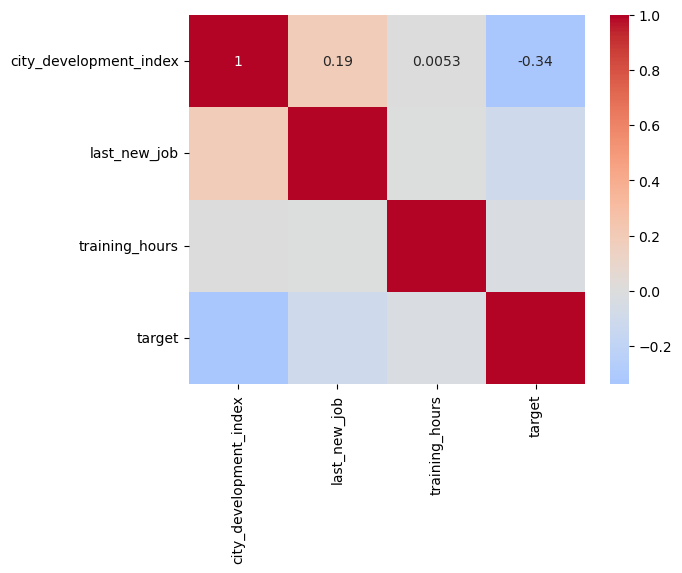

In [187]:
sns.heatmap(data.select_dtypes(include= np.number).corr(),annot=True, cmap='coolwarm', center=0)

In [188]:
px.scatter(data, x='city_development_index', y='training_hours',color= 'looking_for_job_change',color_discrete_sequence=['red','blue'],title='City Development Index vs Training Hours by Target')


c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [189]:
px.scatter(data, x='last_new_job', y='training_hours',color= 'looking_for_job_change',color_discrete_sequence=['red','blue'],title='Years from last new job vs training hours by looking for job change')

c:\MyAnaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [190]:
data

city_development_index  gender      relevent_experience  \
0                       0.920    Male  Has relevent experience   
1                       0.776    Male   No relevent experience   
2                       0.624    Male   No relevent experience   
3                       0.789    Male   No relevent experience   
4                       0.767    Male  Has relevent experience   
...                       ...     ...                      ...   
15946                   0.920  Female  Has relevent experience   
15947                   0.920  Female  Has relevent experience   
15948                   0.878    Male   No relevent experience   
15949                   0.920    Male  Has relevent experience   
15950                   0.920    Male  Has relevent experience   

      enrolled_university education_level major_discipline    experience  \
0           no_enrollment        Graduate             STEM  More_than_15   
1           no_enrollment        Graduate             STEM      10_to_15   
2        Full time course        Graduate             STEM        3_to_5   
3           no_enrollment        Graduate  Business Degree   less_than_3   
4           no_enrollment         Masters             STEM  More_than_15   
...                   ...             ...              ...           ...   
15946       no_enrollment        Graduate             STEM      10_to_15   
15947       no_enrollment        Graduate       Humanities        6_to_9   
15948       no_enrollment        Graduate       Humanities      10_to_15   
15949       no_enrollment        Graduate             STEM      10_to_15   
15950       no_enrollment        Graduate             STEM  More_than_15   

      company_size    company_type  last_new_job  training_hours  target  \
0            50-99         Pvt Ltd             1              36     1.0   
1            50-99         Pvt Ltd             5              47     0.0   
2            50-99         Pvt Ltd             0              83     0.0   
3            50-99         Pvt Ltd             0              52     1.0   
4            50-99  Funded Startup             4               8     0.0   
...            ...             ...           ...             ...     ...   
15946      100-500   Public Sector             3              23     0.0   
15947        10/49  Funded Startup             1              25     0.0   
15948        50-99         Pvt Ltd             1              42     1.0   
15949        50-99         Pvt Ltd             4              52     1.0   
15950        50-99         Pvt Ltd             4              44     0.0   

      looking_for_job_change  
0                        Yes  
1                         No  
2                         No  
3                        Yes  
4                         No  
...                      ...  
15946                     No  
15947                     No  
15948                    Yes  
15949                    Yes  
15950                     No  

[15951 rows x 13 columns]

In [191]:
a=data

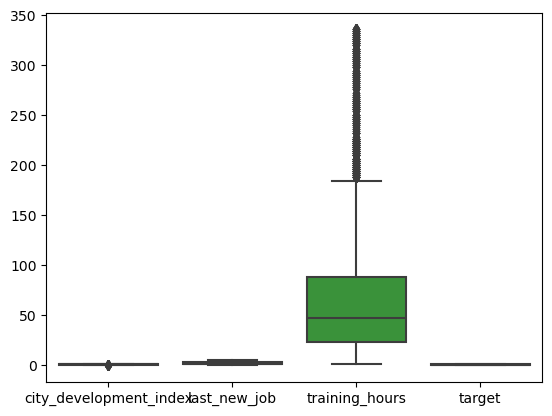

In [192]:
sns.boxplot(data)
plt.show()

c:\MyAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\MyAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



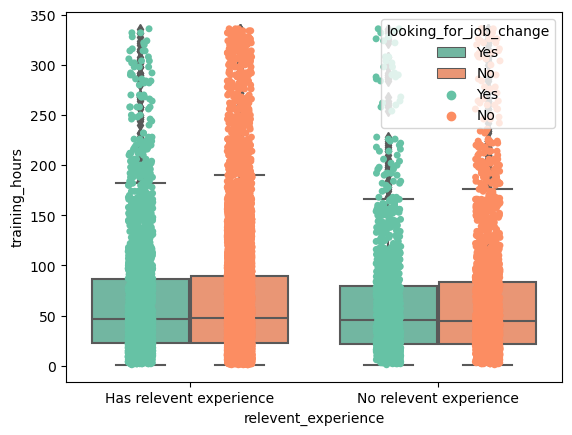

In [193]:
sns.boxplot(data, x='relevent_experience', y='training_hours', hue='looking_for_job_change', palette='Set2')
sns.stripplot(data, x='relevent_experience', y='training_hours', hue='looking_for_job_change', palette='Set2', dodge=True)
plt.show()

## dealing with outliers

In [194]:
for i in range(10):          # have to loop for detecting & deleting outliers becuase after deleting outliers the data is changed
    outliers= detect_outliers( data,0, [ 'training_hours', 'city_development_index'])
    data.drop(outliers, inplace=True) # Drop the outliers from the DataFrame
    data.reset_index(drop=True, inplace=True) # Reset the index of the DataFrame after dropping outliers

c:\MyAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\MyAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



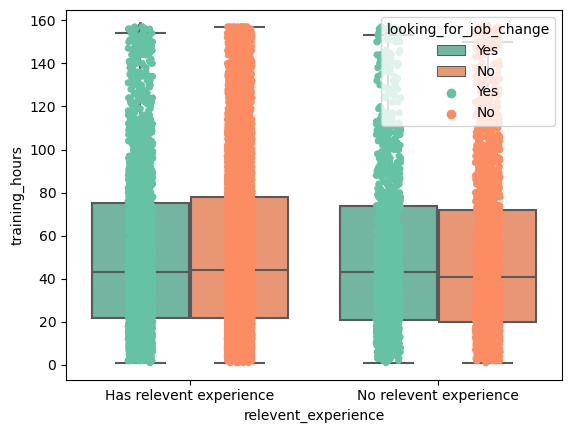

In [195]:
sns.boxplot(data, x='relevent_experience', y='training_hours', hue='looking_for_job_change', palette='Set2')
sns.stripplot(data, x='relevent_experience', y='training_hours', hue='looking_for_job_change', palette='Set2', dodge=True)
plt.show()

<Axes: >

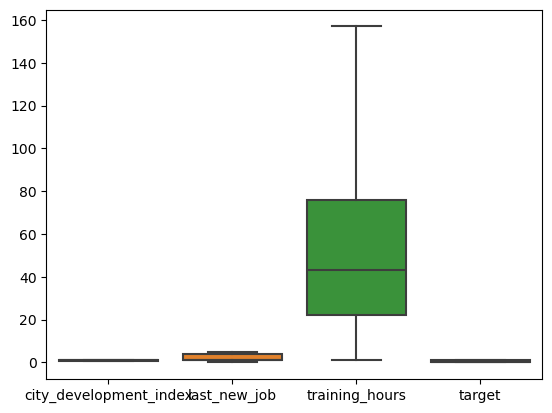

In [196]:
sns.boxplot(data)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14654 entries, 0 to 14653
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  14654 non-null  float64
 1   gender                  14654 non-null  object 
 2   relevent_experience     14654 non-null  object 
 3   enrolled_university     14654 non-null  object 
 4   education_level         14654 non-null  object 
 5   major_discipline        14654 non-null  object 
 6   experience              14654 non-null  object 
 7   company_size            14654 non-null  object 
 8   company_type            14654 non-null  object 
 9   last_new_job            14654 non-null  int32  
 10  training_hours          14654 non-null  int64  
 11  target                  14654 non-null  float64
 12  looking_for_job_change  14654 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1.4+ MB


In [198]:
data.to_csv("3-HR Analytics Job Change of Data Scientists\Data_cleaned.csv", index=False) # Save the cleaned data to a new CSV file

In [199]:
data

city_development_index  gender      relevent_experience  \
0                       0.920    Male  Has relevent experience   
1                       0.776    Male   No relevent experience   
2                       0.624    Male   No relevent experience   
3                       0.789    Male   No relevent experience   
4                       0.767    Male  Has relevent experience   
...                       ...     ...                      ...   
14649                   0.920  Female  Has relevent experience   
14650                   0.920  Female  Has relevent experience   
14651                   0.878    Male   No relevent experience   
14652                   0.920    Male  Has relevent experience   
14653                   0.920    Male  Has relevent experience   

      enrolled_university education_level major_discipline    experience  \
0           no_enrollment        Graduate             STEM  More_than_15   
1           no_enrollment        Graduate             STEM      10_to_15   
2        Full time course        Graduate             STEM        3_to_5   
3           no_enrollment        Graduate  Business Degree   less_than_3   
4           no_enrollment         Masters             STEM  More_than_15   
...                   ...             ...              ...           ...   
14649       no_enrollment        Graduate             STEM      10_to_15   
14650       no_enrollment        Graduate       Humanities        6_to_9   
14651       no_enrollment        Graduate       Humanities      10_to_15   
14652       no_enrollment        Graduate             STEM      10_to_15   
14653       no_enrollment        Graduate             STEM  More_than_15   

      company_size    company_type  last_new_job  training_hours  target  \
0            50-99         Pvt Ltd             1              36     1.0   
1            50-99         Pvt Ltd             5              47     0.0   
2            50-99         Pvt Ltd             0              83     0.0   
3            50-99         Pvt Ltd             0              52     1.0   
4            50-99  Funded Startup             4               8     0.0   
...            ...             ...           ...             ...     ...   
14649      100-500   Public Sector             3              23     0.0   
14650        10/49  Funded Startup             1              25     0.0   
14651        50-99         Pvt Ltd             1              42     1.0   
14652        50-99         Pvt Ltd             4              52     1.0   
14653        50-99         Pvt Ltd             4              44     0.0   

      looking_for_job_change  
0                        Yes  
1                         No  
2                         No  
3                        Yes  
4                         No  
...                      ...  
14649                     No  
14650                     No  
14651                    Yes  
14652                    Yes  
14653                     No  

[14654 rows x 13 columns]

## Dealing with categorical data

In [200]:
data = pd.get_dummies(data, columns= ['gender','relevent_experience','enrolled_university'],drop_first = True,dtype = 'int')
data.drop ('looking_for_job_change',axis =1 , inplace= True)
data

city_development_index education_level major_discipline    experience  \
0                       0.920        Graduate             STEM  More_than_15   
1                       0.776        Graduate             STEM      10_to_15   
2                       0.624        Graduate             STEM        3_to_5   
3                       0.789        Graduate  Business Degree   less_than_3   
4                       0.767         Masters             STEM  More_than_15   
...                       ...             ...              ...           ...   
14649                   0.920        Graduate             STEM      10_to_15   
14650                   0.920        Graduate       Humanities        6_to_9   
14651                   0.878        Graduate       Humanities      10_to_15   
14652                   0.920        Graduate             STEM      10_to_15   
14653                   0.920        Graduate             STEM  More_than_15   

      company_size    company_type  last_new_job  training_hours  target  \
0            50-99         Pvt Ltd             1              36     1.0   
1            50-99         Pvt Ltd             5              47     0.0   
2            50-99         Pvt Ltd             0              83     0.0   
3            50-99         Pvt Ltd             0              52     1.0   
4            50-99  Funded Startup             4               8     0.0   
...            ...             ...           ...             ...     ...   
14649      100-500   Public Sector             3              23     0.0   
14650        10/49  Funded Startup             1              25     0.0   
14651        50-99         Pvt Ltd             1              42     1.0   
14652        50-99         Pvt Ltd             4              52     1.0   
14653        50-99         Pvt Ltd             4              44     0.0   

       gender_Male  gender_Other  relevent_experience_No relevent experience  \
0                1             0                                           0   
1                1             0                                           1   
2                1             0                                           1   
3                1             0                                           1   
4                1             0                                           0   
...            ...           ...                                         ...   
14649            0             0                                           0   
14650            0             0                                           0   
14651            1             0                                           1   
14652            1             0                                           0   
14653            1             0                                           0   

       enrolled_university_Part time course  enrolled_university_no_enrollment  
0                                         0                                  1  
1                                         0                                  1  
2                                         0                                  0  
3                                         0                                  1  
4                                         0                                  1  
...                                     ...                                ...  
14649                                     0                                  1  
14650                                     0                                  1  
14651                                     0                                  1  
14652                                     0                                  1  
14653                                     0                                  1  

[14654 rows x 14 columns]

## One hot encoder

In [201]:
onehot = OneHotEncoder(drop= 'first')
onehot.fit(data[['company_type','major_discipline']])
onehot

OneHotEncoder(drop='first')

In [202]:
onehot_df = onehot.transform(data[['company_type','major_discipline']])
onehot_df.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [203]:
df_encoded = pd.DataFrame(onehot_df.toarray(), columns= onehot.get_feature_names_out())
df_encoded


company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                              0.0               0.0                 0.0   
1                              0.0               0.0                 0.0   
2                              0.0               0.0                 0.0   
3                              0.0               0.0                 0.0   
4                              1.0               0.0                 0.0   
...                            ...               ...                 ...   
14649                          0.0               0.0                 0.0   
14650                          1.0               0.0                 0.0   
14651                          0.0               0.0                 0.0   
14652                          0.0               0.0                 0.0   
14653                          0.0               0.0                 0.0   

       company_type_Public Sector  company_type_Pvt Ltd  \
0                             0.0                   1.0   
1                             0.0                   1.0   
2                             0.0                   1.0   
3                             0.0                   1.0   
4                             0.0                   0.0   
...                           ...                   ...   
14649                         1.0                   0.0   
14650                         0.0                   0.0   
14651                         0.0                   1.0   
14652                         0.0                   1.0   
14653                         0.0                   1.0   

       major_discipline_Business Degree  major_discipline_Humanities  \
0                                   0.0                          0.0   
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   1.0                          0.0   
4                                   0.0                          0.0   
...                                 ...                          ...   
14649                               0.0                          0.0   
14650                               0.0                          1.0   
14651                               0.0                          1.0   
14652                               0.0                          0.0   
14653                               0.0                          0.0   

       major_discipline_No Major  major_discipline_Other  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
14649                        0.0                     0.0   
14650                        0.0                     0.0   
14651                        0.0                     0.0   
14652                        0.0                     0.0   
14653                        0.0                     0.0   

       major_discipline_STEM  
0                        1.0  
1                        1.0  
2                        1.0  
3                        0.0  
4                        1.0  
...                      ...  
14649                    1.0  
14650                    0.0  
14651                    0.0  
14652                    1.0  
14653                    1.0  

[14654 rows x 10 columns]

In [204]:
data = pd.concat([data,df_encoded],axis =1)
data.drop(['company_type','major_discipline'],axis =1 , inplace= True)
data

city_development_index education_level    experience company_size  \
0                       0.920        Graduate  More_than_15        50-99   
1                       0.776        Graduate      10_to_15        50-99   
2                       0.624        Graduate        3_to_5        50-99   
3                       0.789        Graduate   less_than_3        50-99   
4                       0.767         Masters  More_than_15        50-99   
...                       ...             ...           ...          ...   
14649                   0.920        Graduate      10_to_15      100-500   
14650                   0.920        Graduate        6_to_9        10/49   
14651                   0.878        Graduate      10_to_15        50-99   
14652                   0.920        Graduate      10_to_15        50-99   
14653                   0.920        Graduate  More_than_15        50-99   

       last_new_job  training_hours  target  gender_Male  gender_Other  \
0                 1              36     1.0            1             0   
1                 5              47     0.0            1             0   
2                 0              83     0.0            1             0   
3                 0              52     1.0            1             0   
4                 4               8     0.0            1             0   
...             ...             ...     ...          ...           ...   
14649             3              23     0.0            0             0   
14650             1              25     0.0            0             0   
14651             1              42     1.0            1             0   
14652             4              52     1.0            1             0   
14653             4              44     0.0            1             0   

       relevent_experience_No relevent experience  ...  \
0                                               0  ...   
1                                               1  ...   
2                                               1  ...   
3                                               1  ...   
4                                               0  ...   
...                                           ...  ...   
14649                                           0  ...   
14650                                           0  ...   
14651                                           1  ...   
14652                                           0  ...   
14653                                           0  ...   

       company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                              0.0               0.0                 0.0   
1                              0.0               0.0                 0.0   
2                              0.0               0.0                 0.0   
3                              0.0               0.0                 0.0   
4                              1.0               0.0                 0.0   
...                            ...               ...                 ...   
14649                          0.0               0.0                 0.0   
14650                          1.0               0.0                 0.0   
14651                          0.0               0.0                 0.0   
14652                          0.0               0.0                 0.0   
14653                          0.0               0.0                 0.0   

       company_type_Public Sector  company_type_Pvt Ltd  \
0                             0.0                   1.0   
1                             0.0                   1.0   
2                             0.0                   1.0   
3                             0.0                   1.0   
4                             0.0                   0.0   
...                           ...                   ...   
14649                         1.0                   0.0   
14650                         0.0                   0.0   
14651                         0.0                   1.0   
14652

## Label encoder

In [205]:
data['education_level'].unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [206]:
education_level = {'Graduate': 0 , 'Masters': 1 , 'Phd': 2}
data['education_level'] = data['education_level'].map(education_level)

In [207]:
data['experience'].unique()

array(['More_than_15', '10_to_15', '3_to_5', 'less_than_3', '6_to_9'],
      dtype=object)

In [208]:
experience = {'less_than_3': 0 , '3_to_5': 1 , '6_to_9': 2 , '10_to_15': 3 , 'More_than_15': 4}
data['experience'] = data['experience'].map(experience)

In [209]:
data['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [210]:
company_size= {'<10': 0 , '10/49': 1 , '50-99': 2 , '100-500': 3 , '500-999': 4 ,'1000-4999' : 5,'5000-9999':6 ,'10000+': 7}
data['company_size']=data['company_size'].map(company_size)

In [211]:
data

city_development_index  education_level  experience  company_size  \
0                       0.920                0           4             2   
1                       0.776                0           3             2   
2                       0.624                0           1             2   
3                       0.789                0           0             2   
4                       0.767                1           4             2   
...                       ...              ...         ...           ...   
14649                   0.920                0           3             3   
14650                   0.920                0           2             1   
14651                   0.878                0           3             2   
14652                   0.920                0           3             2   
14653                   0.920                0           4             2   

       last_new_job  training_hours  target  gender_Male  gender_Other  \
0                 1              36     1.0            1             0   
1                 5              47     0.0            1             0   
2                 0              83     0.0            1             0   
3                 0              52     1.0            1             0   
4                 4               8     0.0            1             0   
...             ...             ...     ...          ...           ...   
14649             3              23     0.0            0             0   
14650             1              25     0.0            0             0   
14651             1              42     1.0            1             0   
14652             4              52     1.0            1             0   
14653             4              44     0.0            1             0   

       relevent_experience_No relevent experience  ...  \
0                                               0  ...   
1                                               1  ...   
2                                               1  ...   
3                                               1  ...   
4                                               0  ...   
...                                           ...  ...   
14649                                           0  ...   
14650                                           0  ...   
14651                                           1  ...   
14652                                           0  ...   
14653                                           0  ...   

       company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                              0.0               0.0                 0.0   
1                              0.0               0.0                 0.0   
2                              0.0               0.0                 0.0   
3                              0.0               0.0                 0.0   
4                              1.0               0.0                 0.0   
...                            ...               ...                 ...   
14649                          0.0               0.0                 0.0   
14650                          1.0               0.0                 0.0   
14651                          0.0               0.0                 0.0   
14652                          0.0               0.0                 0.0   
14653                          0.0               0.0                 0.0   

       company_type_Public Sector  company_type_Pvt Ltd  \
0                             0.0                   1.0   
1                             0.0                   1.0   
2                             0.0                   1.0   
3                             0.0                   1.0   
4                             0.0                   0.0   
...                           ...                   ...   
14649                         1.0                   0.0   
14650                         0.0                   0.0   
14651                         0.0                   1.0   
14652

## Split data into x & y

In [212]:
x= data.drop(['target'],axis=1)
y= data['target']

## split data into train & test

In [213]:
x_train , x_test ,y_train , y_test = train_test_split(x,y , test_size = 0.2 ,stratify= y)

## scaling using standard scaler

In [214]:
standerd_scaler = StandardScaler()
x_train_scaled = standerd_scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)

In [215]:
x_test_scaled = standerd_scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled ,columns = x_test.columns)

## Handle impalance data

In [216]:
y_train.value_counts()

target
0.0    8697
1.0    3026
Name: count, dtype: int64

In [217]:
#! pip install imblearn

In [218]:
rus = RandomUnderSampler()
x_train_us , y_train_us = rus.fit_resample(x_train_scaled , y_train)

In [219]:
x_train_us = pd.DataFrame(x_train_us, columns = x_train.columns)
x_train_us

city_development_index  education_level  experience  company_size  \
10125               -0.434843         1.319997   -0.301854     -0.492886   
6829                 0.733774        -0.622062   -1.058942     -0.492886   
5938                 0.547120         1.319997   -0.301854      2.042483   
6156                 0.733774        -0.622062   -1.058942     -1.507034   
3990                 0.782467         1.319997    1.212323      0.014188   
...                       ...              ...         ...           ...   
11704                0.733774         1.319997    0.455235     -0.492886   
11708                0.733774        -0.622062   -0.301854     -0.492886   
11715                0.733774        -0.622062    1.212323     -0.492886   
11721               -0.548458        -0.622062    0.455235     -0.999960   
11722                0.758120        -0.622062   -1.058942      1.028335   

       last_new_job  training_hours  gender_Male  gender_Other  \
10125     -0.084951       -0.743108     0.302198     -0.095976   
6829      -0.682722        0.156863     0.302198     -0.095976   
5938      -0.682722       -1.113684     0.302198     -0.095976   
6156      -0.682722        0.050984     0.302198     -0.095976   
3990      -0.084951        1.692107     0.302198     -0.095976   
...             ...             ...          ...           ...   
11704     -0.682722        0.262742     0.302198     -0.095976   
11708     -0.682722       -1.298972     0.302198     -0.095976   
11715     -1.280493       -1.007805     0.302198     -0.095976   
11721     -0.682722        1.427410     0.302198     -0.095976   
11722      1.708360        0.474500     0.302198     -0.095976   

       relevent_experience_No relevent experience  \
10125                                   -0.529889   
6829                                     1.887188   
5938                                    -0.529889   
6156                                    -0.529889   
3990                                    -0.529889   
...                                           ...   
11704                                   -0.529889   
11708                                   -0.529889   
11715                                   -0.529889   
11721                                   -0.529889   
11722                                   -0.529889   

       enrolled_university_Part time course  ...  company_type_Funded Startup  \
10125                             -0.253718  ...                    -0.248729   
6829                              -0.253718  ...                    -0.248729   
5938                              -0.253718  ...                    -0.248729   
6156                              -0.253718  ...                    -0.248729   
3990                              -0.253718  ...                    -0.248729   
...                                     ...  ...                          ...   
11704                             -0.253718  ...                    -0.248729   
11708                             -0.253718  ...                    -0.248729   
11715                             -0.253718  ...                    -0.248729   
11721                             -0.253718  ...                    -0.248729   
11722                              3.941390  ...                    -0.248729   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
10125         -0.175943            -0.07806                   -0.238312   
6829          -0.175943            -0.07806                   -0.238312   
5938          -0.175943            -0.07806                   -0.238312   
6156          -0.175943            -0.07806                   -0.238312   
3990          -0.175943            -0.07806                   -0.238312   
...                 ...                 ...                         ...   
11704         -0.175943            -0.07806                   -0.238312   
11708         -0.175943            -0.07806                   -0.238312   
11715         -0

In [220]:
y_train_us.value_counts()

target
0.0    3026
1.0    3026
Name: count, dtype: int64